In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from termcolor import colored
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/My Drive/dataset/master.csv")
df=df.drop(['country-year'],axis=1) 
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(float)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2.156625e+09,796,Boomers


#1st Hypothesis Testing

In [ ]:
mu=df['suicides_no'].mean()
mu=round(mu,2)
print('Mean',mu)
std=df['suicides_no'].std()
std=round(std,2)
print('sigma',std)

Mean 242.57
sigma 902.05


Sample data:

In [ ]:
sample=df.iloc[600:640,4].to_frame()
sample.head(5)

,suicides_no
600,230
601,530
602,478
603,209
604,48


In [ ]:
xbar=sample['suicides_no'].mean()
xbar=round(xbar,2)
print('Sample Mean',xbar)


Sample Mean 205.18


#1)  A researcher claims that the average number of suicides is different from  242.57. A sample of 40 data collected has an average suicide number as 205.18 and 902.05 as population standard deviation. At alpha=0.1, is there enough evidence to reject the claim?

Z-test can be used since population standard deviation is known and n>30.

In [ ]:
#Step 1:
#H0 : μ = 242.57 and Ha : μ ≠ 242.57 (claim)
n = 40
xbar = 205.18
mu = 242.57
sigma = 902.05
alpha = 0.10

#Step 2:
z = (xbar - mu) / (sigma / np.sqrt(n))
z=round(z,3)
print(colored('z score','red'),z)

#Step 3: Critical value for two-tailed test
print(colored("CRITICAL VALUES:",'green'))
z_critical_right = abs(st.norm.ppf(0.10/2))
z_critical_right=round(z_critical_right,3)
print('Critical value on the right side of the normal distribution',z_critical_right)

z_critical_left = (st.norm.ppf(0.10/2))
z_critical_left=round(z_critical_left,3)
print('Critical value on the left side of the normal distribution',z_critical_left)

#Step 4:
print("DECISION:")
if (z < z_critical_right and z > z_critical_left):
  print(colored("Failed to reject null hypothesis",'blue'))
else:
  print(colored("Reject null hypothesis",'red'))

#Step 5:
print("CONCLUSION:")
if (z < z_critical_right and z > z_critical_left):
  print(colored("There is not enough evidence to support the claim that the average suicide number is different from 242.57",'blue'))
else:
  print(colored("There is enough evidence to support the claim that the average suicide number is different from 242.57",'red'))

z score -0.262
CRITICAL VALUES:
Critical value on the right side of the normal distribution 1.645
Critical value on the left side of the normal distribution -1.645
DECISION:
Failed to reject null hypothesis
CONCLUSION:
There is not enough evidence to support the claim that the average suicide number is different from 242.57


Failing to reject the null indicates that our sample did not provide sufficient evidence to conclude that the effect exists. However, at the same time, that lack of evidence doesn’t prove that the effect does not exist.
Not enough evidence is available to suggest the null is false at the 90% confidence level.

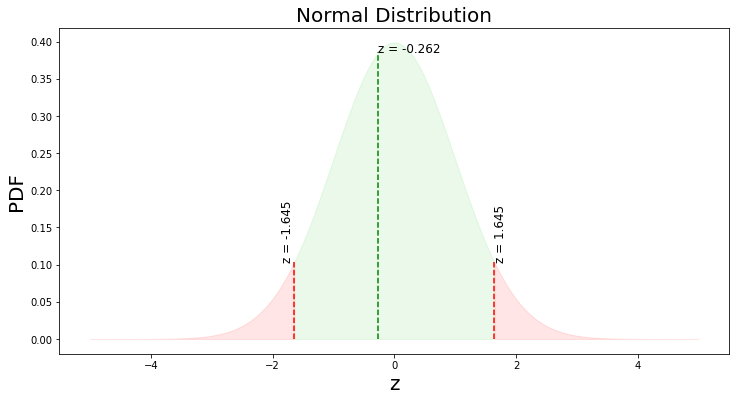

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()
x = np.linspace(-5,5, 1000)
y = norm.pdf(x)
ax.vlines(z_critical_right, 0, norm.pdf(z_critical_right), color='red', linestyle='--')
ax.vlines(z_critical_left, 0, norm.pdf(z_critical_left), color='red', linestyle='--')
ax.fill_between(x, 0, y, color='limegreen', alpha=0.1,where=(x > z_critical_left) & (x < z_critical_right))
ax.fill_between(x,0,y,color='red',alpha=0.1,where=(x < z_critical_left))
ax.fill_between(x,0,y,color='red',alpha=0.1,where=(x > z_critical_right))
ax.vlines(z,0,norm.pdf(z), color='green', linestyle='--')
plt.xlabel('z',size=20)
plt.ylabel('PDF',size=20)
plt.title('Normal Distribution',size=20)
plt.text(z_critical_left, norm.pdf(z_critical_left), "z = {0:.3f}".format(z_critical_left), fontsize=12,rotation=90, va="bottom", ha="right")
plt.text(z_critical_right, norm.pdf(z_critical_right), "z = {0:.3f}".format(z_critical_right),fontsize=12, rotation=90, va="bottom", ha="left")
plt.text(z, norm.pdf(z), "z = {0:.3f}".format(z),fontsize=12);

The z test value does not lie in the critical region. Hence, failed to reject null hyothesis.

#Using P-value method,

In [ ]:
p_val = (1-st.norm.cdf(z))
p_val=round(p_val,3)
print(colored("P-value",'red'),p_val)
print(colored("Alpha  ",'red'),alpha)

if (p_val>alpha):
  print('P value > alpha')
  print(colored("So, failed to reject null hypothesis",'blue'))
else:
  print('P value < alpha')
  print(colored("So, reject null hypothesis",'red'))

if (p_val>alpha):
  print(colored("There is not enough evidence to support the claim that the average suicide number is different from 242.57",'blue'))
else:
  print(colored("There is enough evidence to support the claim that the average suicide number is different from 242.57",'red')) 

P-value 0.603
Alpha   0.1
P value > alpha
So, failed to reject null hypothesis
There is not enough evidence to support the claim that the average suicide number is different from 242.57


#By confidence interval method,

In [ ]:
# 90% confidence interval is taken,
a =xbar - (z_critical_right*(sigma / np.sqrt(n)))
a=round(a,2)
b =xbar + (z_critical_right*(sigma / np.sqrt(n)))
b=round(b,2)
print(a,'< mu <',b)
if (a < mu and b > mu):
  print(colored(" mu lies in the confidence interval 90 % and therfore the test supports proper inflation at 10% level of significance.",'blue'))
else:
  print(colored(" mu does not lie in the confidence interval 90 % and therfore the test does not support proper inflation at 10% level of significance.",'red'))

-29.44 < mu < 439.8
 mu lies in the confidence interval 90 % and therfore the test supports proper inflation at 10% level of significance.


#2nd Hypothesis Testing :

Population:

In [ ]:
pop_data=df.loc[df['country']=='Portugal','suicides/100k pop'].to_frame().reset_index()
pop_data.head(5)

,index,suicides/100k pop
0,19356,55.43
1,19357,30.41
2,19358,16.76
3,19359,13.53
4,19360,12.37


In [ ]:
mu=pop_data['suicides/100k pop'].mean()
mu=round(mu,2)
print("Mean",mu)

Mean 11.34


Sample data:

In [ ]:
sample1=pop_data.sample(n=10,random_state=0)
sample1

,index,suicides/100k pop
295,19651,3.35
65,19421,7.55
15,19371,12.05
274,19630,0.19
140,19496,1.73
153,19509,1.16
101,19457,6.28
234,19590,4.88
63,19419,14.88
159,19515,7.97


In [ ]:
xbar=sample1['suicides/100k pop'].mean()
xbar=round(xbar,2)
print("Sample Mean",xbar)
s=sample1['suicides/100k pop'].std()
s=round(s,2)
print("Sample Std ",s)

Sample Mean 6.0
Sample Std  4.78


#2) A newspaper claims that the average number of suicides in Portugal is greater than 11.34 per 100k population. A random sample of 10 data were collected which has a mean of 6 per 100k population. The sample standard deviation is 4.78. Is there eough evidence to reject the newpaper's claim at alpha =0.05?

T-test can be used since population standard deviation is unknown and n>=30.

In [ ]:
#Step 1:
#H0 : μ = 11.34  and Ha : μ > 11.34 (claim)
n = 10
xbar = 6
mu = 11.34
s=4.78
alpha = 0.05
degrees_of_freedom=n-1

#Step 2:
t = (xbar - mu) / (s / np.sqrt(n))
t=round(t,3)
print(colored('t-value','blue'),t)

#Step 3: Critical value for right-tailed test
t_critical = abs(st.t.ppf(alpha, degrees_of_freedom))
t_critical =round(t_critical,2)
print(colored("CRITICAL VALUE:",'green'),t_critical)

#Step 4:
print("DECISION:")
if (abs(t) < abs(t_critical)):
  print(colored("Failed to reject null hypothesis",'blue'))
else:
  print(colored("Reject null hypothesis",'red'))

#Step 5:
print("CONCLUSION:")
if (abs(t) < abs(t_critical)):
  print(colored("There is not enough evidence to support the claim that the average suicide number per 100k population is greater than 11.34.",'blue'))
else:
  print(colored("There is enough evidence to support the claim that the average suicide number per 100k population is greater than 11.34. ",'red'))

t-value -3.533
CRITICAL VALUE: 1.83
DECISION:
Reject null hypothesis
CONCLUSION:
There is enough evidence to support the claim that the average suicide number per 100k population is greater than 11.34. 


This means that the sample data choosen favors the alternative hypothesis.  Thus, results are statistically significant and the choosen sample has effect on the popultion.

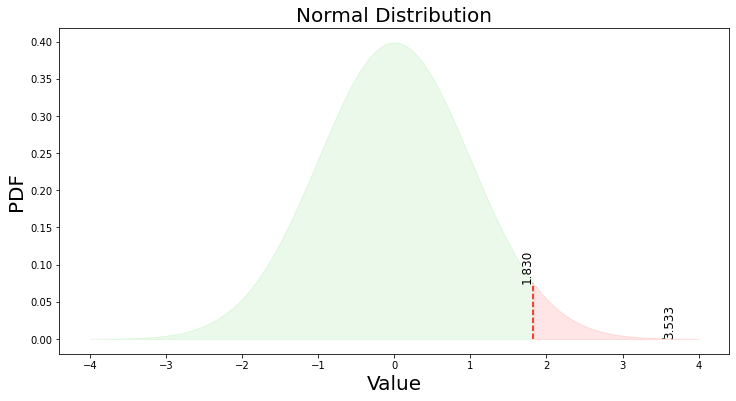

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()
x = np.linspace(-4,4, 1000)
y = norm.pdf(x)
ax.vlines(t_critical, 0, norm.pdf(t_critical), color='red', linestyle='--')
ax.fill_between(x, 0, y, color='red', alpha=0.1,where=(x > t_critical))
ax.fill_between(x,0,y,color='limegreen',alpha=0.1,where=(x < t_critical))
ax.vlines(abs(t),0,norm.pdf(t), color='green', linestyle='--')
plt.xlabel('Value',size=20)
plt.ylabel('PDF',size=20)
plt.title('Normal Distribution',size=20)
plt.text(t_critical, norm.pdf(t_critical), "{0:.3f}".format(t_critical), fontsize=12,rotation=90, va="bottom", ha="right")
plt.text(abs(t), norm.pdf(t), "{0:.3f}".format(abs(t)),fontsize=12,rotation=90, va="bottom");

Since t-score lies in the critical region, null hypothesis is rejected.

#By P-value method,

In [ ]:
p_val = (1-st.t.cdf(abs(t) ,degrees_of_freedom)) #"1 - cdf" because it's a right-tailed test
p_val=round(p_val,2)
print(colored("P-value",'red'),p_val)
print(colored("Alpha ",'red'),alpha)
if (p_val>alpha):
  print('P value > alpha')
  print(colored("So, failed to reject null hypothesis",'blue'))
else:
  print('P value < alpha')
  print(colored("So, reject null hypothesis",'red'))

if (p_val>alpha):
  print(colored("There is not enough evidence to support the claim that the average suicide number per 100k population is greater than 11.34",'blue'))
else:
  print(colored("There is enough evidence to support the claim that the average suicide number per 100k population is greater than 11.34",'red')) 


P-value 0.0
Alpha  0.05
P value < alpha
So, reject null hypothesis
There is enough evidence to support the claim that the average suicide number per 100k population is greater than 11.34


#3rd Hypothesis Testing

Population data:

In [ ]:
population=df.loc[df['year']==2003,'gdp_per_capita ($)'].to_frame()
population.head(5)

,gdp_per_capita ($)
168,2021
169,2021
170,2021
171,2021
172,2021


In [ ]:
sigma=population['gdp_per_capita ($)'].std()
sigma=round(sigma,2)
print('Population Std',sigma)

Population Std 15429.52


Sample data:

In [ ]:
sam=population.sample(n=24,random_state=0)
sam.head(5)

,gdp_per_capita ($)
17286,37614
25151,2531
22037,2979
6771,3409
11897,42174


In [ ]:
s=sam['gdp_per_capita ($)'].std()
s=round(s,2)
print('Sample Std',s)

Sample Std 14596.29


#3) A medical researcher from past studies claimes that the standard deviation of GDP per Capita in the year 2003 is lesser than 15429.52. A random sample of 24 data is selected and inspected. The sample standard deviation is 14596.29. At alpha=0.05, can it be concluded that the standard deviation has changed?

Since only standard deviations of population and sample are given, chi-square test is applied.

In [ ]:
#Step 1:
#H0 : σ = 15429.52 , Ha : σ < 15429.52 (claim)
n = 24
degrees_of_freedom = n-1
s = 14596.29
sigma = 15429.52
alpha = 0.05

#Step 2:
chi_square = ((n-1)*(s**2))/sigma**2
chi_square =round(chi_square,2)
print(colored("Chi-square value",'red'),chi_square)

#Step 3: Critical value for left-tailed test
chi_square_critical = st.chi2.ppf(alpha, degrees_of_freedom) 
chi_square_critical=round(chi_square_critical,2)
print(colored("CRITICAL VALUE:",'green'),chi_square_critical)

#Step 4:
print("DECISION:")
if (chi_square > chi_square_critical):
  print(colored("Failed to reject null hypothesis",'blue'))
else:
  print(colored("Reject null hypothesis",'red'))

#Step 5:
print("CONCLUSION:")
if (chi_square > chi_square_critical):
  print(colored("There is not enough evidence to support the researcher's claim that the that the standard deviation of GDP per Capita in the year 2003 is less than 15429.52.",'blue'))
else:
  print(colored("There is enough evidence to support the researcher's claim that the that the standard deviation of GDP per Capita in the year 2003 is less than 15429.52. ",'red'))

Chi-square value 20.58
CRITICAL VALUE: 13.09
DECISION:
Failed to reject null hypothesis
CONCLUSION:
There is not enough evidence to support the researcher's claim that the that the standard deviation of GDP per Capita in the year 2003 is less than 15429.52.


Failing to reject the null indicates that our sample did not provide sufficient evidence to conclude that the effect exists. However, at the same time, that lack of evidence doesn’t prove that the effect does not exist. Not enough evidence is available to suggest the null is false at the 95% confidence level.

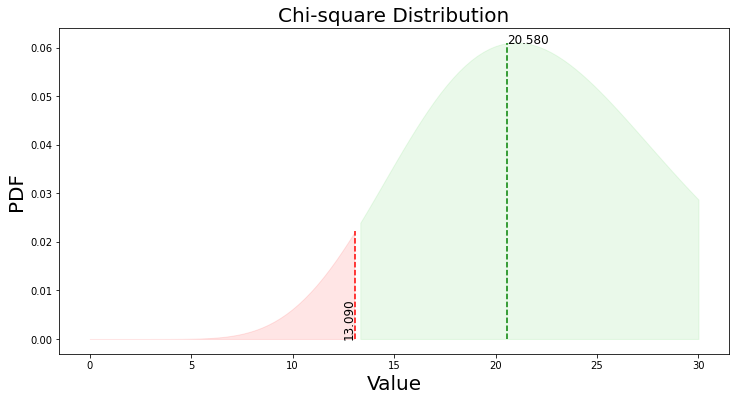

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.subplots()
df=23
x = np.linspace(0,30, 100)
y = st.chi2.pdf(x,df)
ax.vlines(chi_square_critical, 0,st.chi2.pdf(chi_square_critical,df), color='red', linestyle='--')
ax.fill_between(x, 0, y, color='limegreen', alpha=0.1,where=(x > chi_square_critical))
ax.fill_between(x,0,y,color='red',alpha=0.1,where=(x < chi_square_critical))
ax.vlines(chi_square,0,st.chi2.pdf(chi_square,df), color='green', linestyle='--')
plt.xlabel('Value',size=20)
plt.ylabel('PDF',size=20)
plt.title('Chi-square Distribution',size=20)
plt.text(chi_square_critical,st.chi2.pdf(t_critical,df), "{0:.3f}".format(chi_square_critical), fontsize=12,rotation=90, va="bottom", ha="right")
plt.text((chi_square), st.chi2.pdf(chi_square,df), "{0:.3f}".format(chi_square),fontsize=12);

Since chi-square-score does not lie in the critical region, null hypothesis is failed to rejected.